## US Crime Dataset 

In [1]:
# importing modules to read and perform analysis on dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# path to file
file = 'US_Crimes_Data.csv'

# reading file using pandas
df = pd.read_csv(file)

# displaying the first five rows 
df.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Year,Month,Day,Committed_At_Morning
0,201274824,1399,200003695,1/22/2020 21:14,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,ST,1/20/2020 15:00,1/22/2020 14:30,39.119555,-77.236224,6D,2020.0,1.0,20.0,False
1,201340170,2902,210029773,8/1/2021 0:33,290,1,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - PRIVATE,WHEATON,...,BLV,8/1/2021 0:33,NaN,39.029743,-77.021127,4D,2021.0,8.0,1.0,True
2,201336300,2303,210024908,6/29/2021 11:47,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,OTHER,...,AVE,6/27/2021 16:00,6/27/2021 16:05,NaN,NaN,OTHER,2021.0,6.0,27.0,False
3,201276711,1315,200006150,2/6/2020 12:05,13A,1,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - OTHER,BETHESDA,...,BLV,2/6/2020 6:30,2/6/2020 7:00,39.034983,-77.069738,2D,2020.0,2.0,6.0,True
4,201331372,9099,210018904,5/19/2021 14:28,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,...,BLV,6/15/2020 0:00,2/23/2021 0:00,39.023036,-77.016795,3D,2020.0,6.0,15.0,True


The data from csv file is read into python kernel.

In [3]:
# displaying columns in dataframe
print(df.columns)

Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number',
       'Street Name', 'Street Suffix', 'Street Type', 'Start_Date_Time',
       'End_Date_Time', 'Latitude', 'Longitude', 'Police District Number',
       'Year', 'Month', 'Day', 'Committed_At_Morning'],
      dtype='object')


Renaming the columns to unique style. For example:
Column `Dispatch Date / Time` should be renamed to `Dispatch_Date_Time`.
Column `Incident ID` to `Incident_ID`

In [4]:
# renaming the column name
df.rename(columns = {'Dispatch Date / Time' : 'Dispatch_Date_Time' }, inplace = True )

# changing the ' ' to '_' in column names
for column in df.columns:
    df.rename(columns = {column : column.replace(' ', '_')}, inplace = True )
df.columns

Index(['Incident_ID', 'Offence_Code', 'CR_Number', 'Dispatch_Date_Time',
       'NIBRS_Code', 'Victims', 'Crime_Name1', 'Crime_Name2', 'Crime_Name3',
       'Police_District_Name', 'Block_Address', 'City', 'State', 'Zip_Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address_Number',
       'Street_Name', 'Street_Suffix', 'Street_Type', 'Start_Date_Time',
       'End_Date_Time', 'Latitude', 'Longitude', 'Police_District_Number',
       'Year', 'Month', 'Day', 'Committed_At_Morning'],
      dtype='object')

In [5]:
# displaying the columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3267 entries, 0 to 3266
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Incident_ID             3267 non-null   int64  
 1   Offence_Code            3267 non-null   int64  
 2   CR_Number               3267 non-null   int64  
 3   Dispatch_Date_Time      2710 non-null   object 
 4   NIBRS_Code              3267 non-null   object 
 5   Victims                 3267 non-null   int64  
 6   Crime_Name1             3266 non-null   object 
 7   Crime_Name2             3266 non-null   object 
 8   Crime_Name3             3266 non-null   object 
 9   Police_District_Name    3261 non-null   object 
 10  Block_Address           2606 non-null   object 
 11  City                    2983 non-null   object 
 12  State                   3267 non-null   object 
 13  Zip_Code                3266 non-null   float64
 14  Agency                  3267 non-null   

We can see that there are null values in few columns. 

In [6]:
# Displaying the missing values percentage
print("The missing values percentage is : %.2f"%(df.isna().sum().sum() * 100 / (df.shape[0] * df.shape[1])))

The missing values percentage is : 5.16


The datetime columns are in object data type. These columns need to be type casted into `datetime` datatype

In [7]:
# converting the object to datetime datatype
df['Dispatch_Date_Time'] = pd.to_datetime(df['Dispatch_Date_Time'])
df['Start_Date_Time'] = pd.to_datetime(df['Start_Date_Time'])
df['End_Date_Time'] = pd.to_datetime(df['End_Date_Time'])

df[['Dispatch_Date_Time', 'Start_Date_Time', 'End_Date_Time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3267 entries, 0 to 3266
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Dispatch_Date_Time  2710 non-null   datetime64[ns]
 1   Start_Date_Time     3267 non-null   datetime64[ns]
 2   End_Date_Time       1384 non-null   datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 76.7 KB


The `Block_Address` column is having null values. It is obtained from `Address_Number` and `Street_Name`

In [8]:
# Dropping the column 
df.drop('Block_Address', inplace = True, axis = 1)

## Missing Values

In [9]:
def displayNullCount(df):
    '''
    input: df: pandas dataframe
    output: None
    desc: Displays the null values in each column'''
    for col in df.columns:
        count = df[col].isna().sum()
        if count > 0:
            print(col, count)
            
displayNullCount(df)

Dispatch_Date_Time 557
Crime_Name1 1
Crime_Name2 1
Crime_Name3 1
Police_District_Name 6
City 284
Zip_Code 1
Sector 106
Beat 106
PRA 6
Address_Number 661
End_Date_Time 1883
Latitude 380
Longitude 380
Year 119
Month 119
Day 119


In [10]:
# Displaying the frequency of crimes
df['Crime_Name3'].value_counts()[:5]

DRIVING UNDER THE INFLUENCE LIQUOR    376
LARCENY - SHOPLIFTING                 365
DRUGS - MARIJUANA - POSSESS           365
ASSAULT - 2ND DEGREE                  222
LIQUOR - POSSESS                      164
Name: Crime_Name3, dtype: int64

Replace the null values in `Crime_Name1`, `Crime_Name2`, and `Crime_Name3` based on 'DRIVING UNDER THE INFLUENCE LIQUOR'

In [11]:
# Replacing the missing values
df.loc[df[df['Crime_Name1'].isna()].index, ['Crime_Name1', 'Crime_Name2','Crime_Name3']] = \
df[df['Crime_Name3'] == 'DRIVING UNDER THE INFLUENCE LIQUOR'][['Crime_Name1', 'Crime_Name2','Crime_Name3']].values[0]

print('The Null Values in Crime_Name1, Crime_Name2, Crime_Name3 are ',
      df[['Crime_Name1', 'Crime_Name2','Crime_Name3']].isna().sum().sum())

The Null Values in Crime_Name1, Crime_Name2, Crime_Name3 are  0


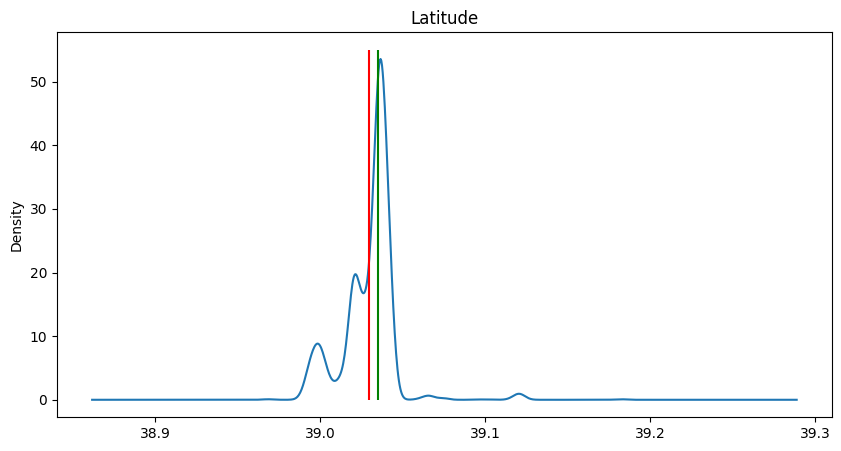

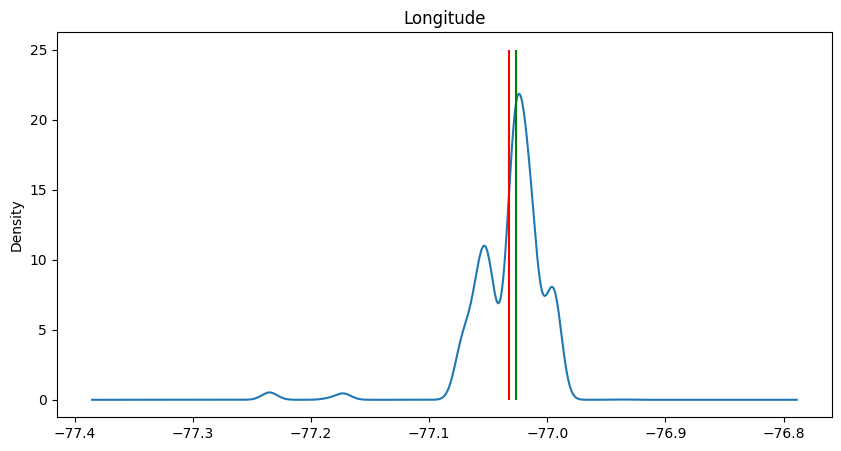

In [12]:
# Plotting the Kernel Distribution Estimation Plot for Latitude
df.Latitude.plot.kde(figsize=(10,5), title = 'Latitude')

# Plotting the mean and median values
plt.vlines(df.Latitude.mean(), ymin = 0, ymax = 55, color = 'r')
plt.vlines(df.Latitude.median(), ymin = 0, ymax = 55, color = 'g')
plt.show()

# Plotting the Kernel Distribution Estimation Plot for Longitude
df.Longitude.plot.kde(figsize=(10,5), title = 'Longitude')

# Plotting the mean and median values
plt.vlines(df.Longitude.mean(), ymin = 0, ymax = 25, color = 'r')
plt.vlines(df.Longitude.median(), ymin = 0, ymax = 25, color = 'g')
plt.show()

In [13]:
# Replacing the Latitude and Longitude with mean value 
df['Latitude'].fillna(df['Latitude'].median(), inplace = True)
df['Longitude'].fillna(df['Longitude'].median(), inplace = True)

df['Latitude'] = df['Latitude'].replace({0 : df['Latitude'].median()})
df['Longitude'] = df['Longitude'].replace({0 : df['Longitude'].median()})


In [14]:
# Finding the coordinates limits of each zip code
zip_codes_coord = {}
for code in df['Zip_Code'].unique():
    if code is not np.NaN:
        zip_codes_coord[code] = {
        'min_lat' : df[(df['Zip_Code'] == code) & (df['Latitude'] != 0)]['Latitude'].min(),
        'max_lat' : df[(df['Zip_Code'] == code) & (df['Latitude'] != 0)]['Latitude'].max(),
        'min_long' :df[(df['Zip_Code'] == code) & (df['Longitude'] != 0)]['Longitude'].min(),
        'max_long' :df[(df['Zip_Code'] == code) & (df['Longitude'] != 0)]['Longitude'].max()
        }

In [15]:
# Creating a dataframe 
zip_codes = pd.DataFrame(zip_codes_coord).T
zip_codes

,min_lat,max_lat,min_long,max_long
20878.0,39.035231,39.181960,-77.236228,-77.026890
20901.0,38.997150,39.036562,-77.030502,-76.993100
20815.0,39.035231,39.035231,-77.026890,-77.026890
20895.0,39.031497,39.040025,-77.075004,-77.026890
20902.0,39.035231,39.041601,-77.059795,-77.025916
20912.0,38.968556,39.036569,-77.031000,-76.987766
20903.0,38.992670,39.035231,-77.026890,-76.991300
20007.0,39.035231,39.035231,-77.026890,-77.026890
20854.0,39.035231,39.074448,-77.185092,-77.026890
20002.0,39.035231,39.035231,-77.026890,-77.026890


In [16]:
# diplaying the coordinates of missing zip code
df[df['Zip_Code'].isna()][['Latitude', 'Longitude']]

,Latitude,Longitude
1186,39.033477,-77.023721


In [17]:
# Finding the coordinates limit of the zip code
zip_codes[(zip_codes['min_lat'] <= 39.033477) & 
          (zip_codes['max_lat'] >= 39.033477) & 
          (zip_codes['min_long'] <= -77.023721) & 
          (zip_codes['max_long'] >= -77.023721)]

,min_lat,max_lat,min_long,max_long
20901.0,38.997150,39.036562,-77.030502,-76.993100
20912.0,38.968556,39.036569,-77.031000,-76.987766
20903.0,38.992670,39.035231,-77.026890,-76.991300
20783.0,38.990891,39.036540,-77.034308,-76.989628


By Looking at the above data, we can decide that the zip code is 20903

In [18]:
# Filling the missing values of zipcode
df['Zip_Code'].fillna(20903, inplace = True)

In [19]:
# Display the null count in dataframe
displayNullCount(df)

Dispatch_Date_Time 557
Police_District_Name 6
City 284
Sector 106
Beat 106
PRA 6
Address_Number 661
End_Date_Time 1883
Year 119
Month 119
Day 119


The Missing values in `Dispatch_Date_Time` and `End_Date_Time` depends on column Start_Date_Time as the dispach will occur ar the time near to the start time of incident.

In [20]:
# Creating two new columns for replacing Dispatch_Date_Time and End_Date_Time
df['Response_Time'] = (df['Dispatch_Date_Time'] - df['Start_Date_Time'] ).astype('timedelta64[m]')
df['Crime_Duration'] = (df['End_Date_Time'] - df['Start_Date_Time']).astype('timedelta64[m]')
df[['Response_Time', 'Crime_Duration']].head()

,Response_Time,Crime_Duration
0,3254.0,2850.0
1,0.0,NaN
2,2627.0,5.0
3,335.0,30.0
4,487588.0,364320.0


In [21]:
# Displaying the uniques values in Crime_Name1
df['Crime_Name1'].unique()

array(['Crime Against Person', 'Crime Against Property',
       'Crime Against Society', 'Not a Crime'], dtype=object)

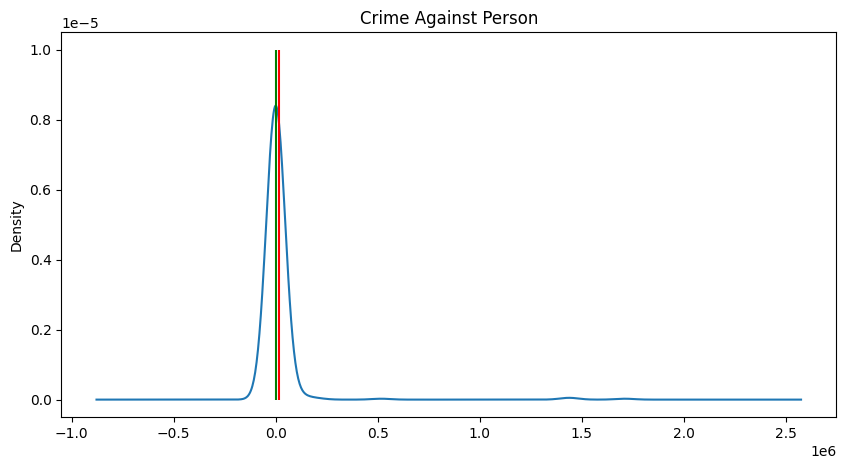

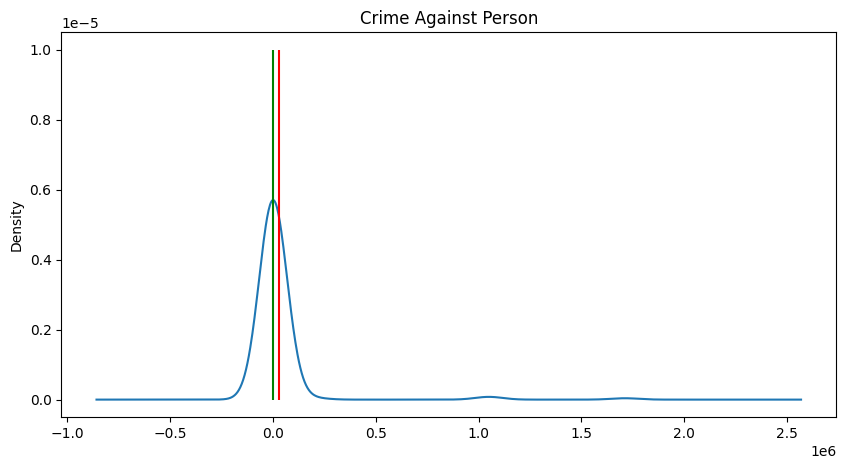

,Response_Time,Crime_Duration
count,3.390000e+02,1.510000e+02
mean,1.796491e+04,2.847563e+04
std,1.474168e+05,1.839324e+05
min,-1.437700e+04,-1.067000e+03
25%,0.000000e+00,2.000000e+00
50%,0.000000e+00,2.500000e+01
75%,3.250000e+01,6.700000e+01
max,1.711892e+06,1.711892e+06


In [22]:
df_Crime_Against_Person = df[df['Crime_Name1'] == 'Crime Against Person']

# Plotting the Kernel Distribution Estimation Plot for Response_Time
df_Crime_Against_Person['Response_Time'].plot.kde(figsize=(10,5), title = 'Crime Against Person')

# Plotting the mean and median values
plt.vlines(df_Crime_Against_Person['Response_Time'].mean(), ymin = 0, ymax = 10e-6, color = 'r')
plt.vlines(df_Crime_Against_Person['Response_Time'].median(), ymin = 0, ymax = 10e-6, color = 'g')
plt.show()

# Plotting the Kernel Distribution Estimation Plot for Crime_Duration
df_Crime_Against_Person['Crime_Duration'].plot.kde(figsize=(10,5), title = 'Crime Against Person')

# Plotting the mean and median values
plt.vlines(df_Crime_Against_Person['Crime_Duration'].mean(), ymin = 0, ymax = 10e-6, color = 'r')
plt.vlines(df_Crime_Against_Person['Crime_Duration'].median(), ymin = 0, ymax = 10e-6, color = 'g')
plt.show()

display(df_Crime_Against_Person[['Response_Time', 'Crime_Duration']].describe())

The values in `Response_Time` and `Crime_Duration` has outliers. By looking at the above observations, the missing values in
`Response_Time` and `Crime_Duration` columns should be replaced with median for `Crime Against Person` in `Crime_Name1` 

In [23]:
# Displaying the statistical analysis 
print('Crime_Name1 => Crime Against Property')
display(df[df['Crime_Name1'] == 'Crime Against Property'][['Response_Time','Crime_Duration']].describe())

print('Crime_Name1 => Crime Against Society')
display(df[df['Crime_Name1'] == 'Crime Against Society'][['Response_Time','Crime_Duration']].describe())

Crime_Name1 => Crime Against Property


,Response_Time,Crime_Duration
count,1.202000e+03,7.740000e+02
mean,5.285760e+03,4.857970e+03
std,3.974633e+04,4.443434e+04
min,-1.439000e+03,-1.399000e+03
25%,0.000000e+00,5.000000e+00
50%,1.400000e+01,8.550000e+01
75%,9.805000e+02,9.495000e+02
max,1.016542e+06,1.052640e+06


Crime_Name1 => Crime Against Society


,Response_Time,Crime_Duration
count,1160.000000,453.000000
mean,1003.714655,1265.145695
std,17839.851719,17843.356340
min,-7012.000000,-1436.000000
25%,-1.000000,0.000000
50%,0.000000,11.000000
75%,0.000000,50.000000
max,487588.000000,364320.000000


Similarly, same for the values `Crime Against Society` and `Crime Against Property`

In [24]:
# Displaying the statistical analysis 
print('Crime_Name1 => Not a Crime')
display(df[df['Crime_Name1'] == 'Not a Crime'][['Response_Time','Crime_Duration']].describe())

Crime_Name1 => Not a Crime


,Response_Time,Crime_Duration
count,9.000000,6.000000
mean,3200.222222,2301.666667
std,4176.396706,4151.989483
min,-90.000000,90.000000
25%,0.000000,397.500000
50%,1005.000000,555.000000
75%,4474.000000,1297.500000
max,10725.000000,10720.000000


In [25]:
# Replacing the missing values in Dispatch_Date_Time
print('Missing values in Dispatch_Date_Time before replacing',df['Dispatch_Date_Time'].isna().sum())

df_1 = df[df['Crime_Name1'] == 'Crime Against Person']
index_replace = df_1[df_1['Dispatch_Date_Time'].isna()].index
df.loc[index_replace, 'Dispatch_Date_Time'] = \
(df['Start_Date_Time'] + df_1['Response_Time'].median().astype('timedelta64[m]')).iloc[index_replace]

df_1 = df[df['Crime_Name1'] == 'Crime Against Property']
index_replace = df_1[df_1['Dispatch_Date_Time'].isna()].index
df.loc[index_replace, 'Dispatch_Date_Time'] = \
(df['Start_Date_Time'] + df_1['Response_Time'].median().astype('timedelta64[m]')).iloc[index_replace]

df_1 = df[df['Crime_Name1'] == 'Crime Against Society']
index_replace = df_1[df_1['Dispatch_Date_Time'].isna()].index
df.loc[index_replace, 'Dispatch_Date_Time'] = \
(df['Start_Date_Time'] + df_1['Response_Time'].median().astype('timedelta64[m]')).iloc[index_replace]

df_1 = df[df['Crime_Name1'] == 'Not a Crime']
index_replace = df_1[df_1['Dispatch_Date_Time'].isna()].index
df.loc[index_replace, 'Dispatch_Date_Time'] = \
(df['Start_Date_Time'] + df_1['Response_Time'].median().astype('timedelta64[m]')).iloc[index_replace]

print('Missing values in Dispatch_Date_Time after replacing',df['Dispatch_Date_Time'].isna().sum())



Missing values in Dispatch_Date_Time before replacing 557
Missing values in Dispatch_Date_Time after replacing 0


In [26]:
# Replacing the missing values in End_Date_Time
print('Missing values in End_Date_Time before replacing',df['End_Date_Time'].isna().sum())

df_1 = df[df['Crime_Name1'] == 'Crime Against Person']
index_replace = df_1[df_1['End_Date_Time'].isna()].index
df.loc[index_replace, 'End_Date_Time'] = \
(df['Start_Date_Time'] + df_1['Crime_Duration'].median().astype('timedelta64[m]')).iloc[index_replace]

df_1 = df[df['Crime_Name1'] == 'Crime Against Property']
index_replace = df_1[df_1['End_Date_Time'].isna()].index
df.loc[index_replace, 'End_Date_Time'] = \
(df['Start_Date_Time'] + df_1['Crime_Duration'].median().astype('timedelta64[m]')).iloc[index_replace]

df_1 = df[df['Crime_Name1'] == 'Crime Against Society']
index_replace = df_1[df_1['End_Date_Time'].isna()].index
df.loc[index_replace, 'End_Date_Time'] = \
(df['Start_Date_Time'] + df_1['Crime_Duration'].median().astype('timedelta64[m]')).iloc[index_replace]

df_1 = df[df['Crime_Name1'] == 'Not a Crime']
index_replace = df_1[df_1['End_Date_Time'].isna()].index
df.loc[index_replace, 'End_Date_Time'] = \
(df['Start_Date_Time'] + df_1['Crime_Duration'].median().astype('timedelta64[m]')).iloc[index_replace]

print('Missing values in End_Date_Time after replacing',df['End_Date_Time'].isna().sum())

Missing values in End_Date_Time before replacing 1883
Missing values in End_Date_Time after replacing 0


In [27]:
# Dropping the new derived columns
df.drop('Response_Time', inplace=True, axis=1)
df.drop('Crime_Duration', inplace=True, axis=1)

In [28]:
displayNullCount(df)

Police_District_Name 6
City 284
Sector 106
Beat 106
PRA 6
Address_Number 661
Year 119
Month 119
Day 119


In [29]:
# Replacing the missing values in Year, Month and Day columns based on Start_Date_Time values
df.loc[df[df['Year'].isna()].index, 'Year'] = df.loc[df[df['Year'].isna()].index, 'Start_Date_Time'].dt.year
df.loc[df[df['Month'].isna()].index, 'Month'] = df.loc[df[df['Month'].isna()].index, 'Start_Date_Time'].dt.month
df.loc[df[df['Day'].isna()].index, 'Day'] = df.loc[df[df['Day'].isna()].index, 'Start_Date_Time'].dt.day
df[['Year', 'Month', 'Day']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3267 entries, 0 to 3266
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    3267 non-null   float64
 1   Month   3267 non-null   float64
 2   Day     3267 non-null   float64
dtypes: float64(3)
memory usage: 76.7 KB


In [30]:
# Dropping the remaining rows containing null values
df.dropna(how='any', inplace=True)

# Checking any null values
df[df.isna().any(axis = 1)]

,Incident_ID,Offence_Code,CR_Number,Dispatch_Date_Time,NIBRS_Code,Victims,Crime_Name1,Crime_Name2,Crime_Name3,Police_District_Name,...,Street_Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police_District_Number,Year,Month,Day,Committed_At_Morning


# Questions

## 1) Find the number of times the offence codes repeated and display the top 10 offence codes reported

In [31]:
# Calculating the frequency of offence codes
df_1 = pd.DataFrame(df['Offence_Code'].value_counts(ascending=False).head(10).reset_index())

# Renaming the columns
df_1.columns = ["Offence_Code", "#_of_reported"]

# Displaying the values
df_1

,Offence_Code,#_of_reported
0,2303,229
1,1399,190
2,3562,179
3,2305,138
4,4104,134
5,5404,115
6,2902,91
7,2308,80
8,5311,79
9,5707,79


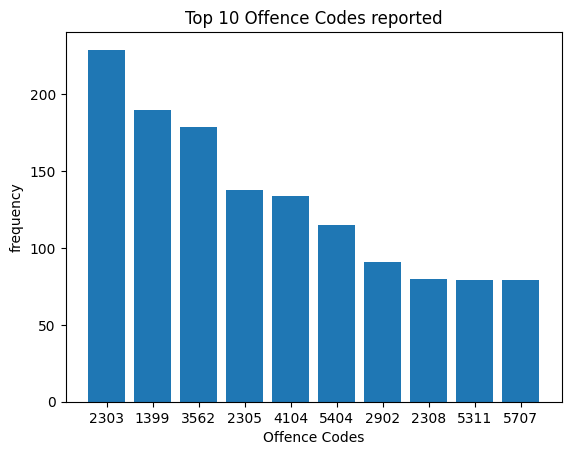

In [32]:
# obtaining the x and y axis
offence_code = np.array(df_1['Offence_Code'], dtype = 'str')
frequency = np.array(df_1['#_of_reported'])

# plotting the horizontal bar graph
plt.bar(offence_code, frequency)

# setting label of y-axis
plt.xlabel("Offence Codes")
 
# setting label of x-axis
plt.ylabel("frequency")

plt.title("Top 10 Offence Codes reported")
plt.show()

## 2) How are the crime occurred  during mornings and evenings varied from 2018 to 2019 and In which year, highest crimes were committed during morning

In [33]:
# Selecting columns, grouping by 'Year' and 'Committed_At_Morning' and counting.
df_2 = df[['Year','Committed_At_Morning', 'Incident_ID']] \
        .groupby(['Year', 'Committed_At_Morning']).count()
        
# Changing the index to default values
df_2 = df_2.reset_index(['Committed_At_Morning'])

# Displaying the crimes in each category
display(df_2[df_2['Committed_At_Morning']],df_2[~df_2['Committed_At_Morning']])

,Committed_At_Morning,Incident_ID
Year,,
2018.0,True,206
2019.0,True,190
2020.0,True,142
2021.0,True,160
2022.0,True,78


,Committed_At_Morning,Incident_ID
Year,,
2018.0,False,424
2019.0,False,365
2020.0,False,281
2021.0,False,248
2022.0,False,129


In [34]:
# Finding the maximum values
df_2[df_2['Incident_ID'] == df_2[df_2['Committed_At_Morning']]['Incident_ID'].max()]

,Committed_At_Morning,Incident_ID
Year,,
2018.0,True,206


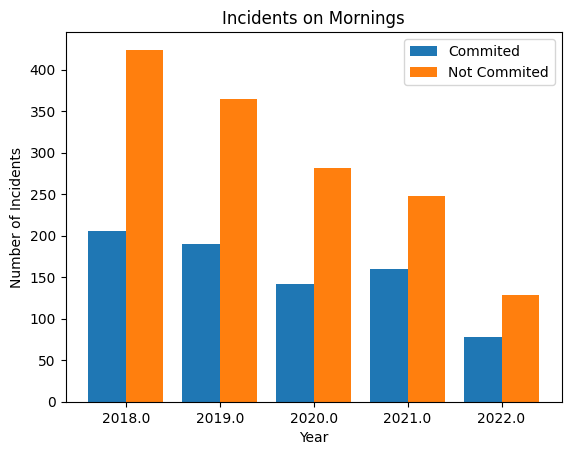

In [35]:
# x-axis
x = df['Year'].unique()
x.sort()
X_axis = np.arange(len(x))

# y-axis
y_commited = []
y_not_commited = []
for i in x:
    y_commited.append(df[df['Year'] == i]['Committed_At_Morning'].value_counts().loc[True])
    y_not_commited.append(df[df['Year'] == i]['Committed_At_Morning'].value_counts().loc[False])
    
# Plotting the bars
plt.bar(X_axis - 0.2 , y_commited, 0.4, label = 'Commited')
plt.bar(X_axis + 0.2 , y_not_commited, 0.4, label = 'Not Commited')
  
# Setting the parameter for plot
plt.xticks(X_axis, x)
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.title("Incidents on Mornings")
plt.legend()
plt.show()

## 3) Find out the crimes happened in Silver Spring City and how they are changed from 2016 to 2022

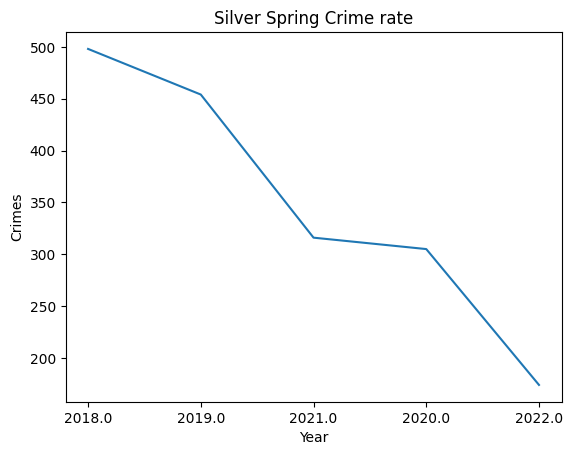

In [36]:
# Getting the year of crimes committed in SILVER SPRING 
crime_count = df[df['City'] == 'SILVER SPRING']['Year']
crime_count = crime_count.value_counts()

# x and y axis values
year = crime_count.index
count = crime_count.values
X_axis = np.arange(len(year))

# Plotting 
plt.plot(X_axis, count)
plt.xticks(X_axis, year)

# labelling the plot
plt.title('Silver Spring Crime rate')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.show()

## 4) Find the number of crimes occurred with respect to each hour of the day and What time of the day most incidents happen?

In [37]:
# Extracting the hour from Dispatch_Date_Time
df['hour'] = df.Dispatch_Date_Time.dt.hour

# Calculating the frequency of crimes per hour
df_4 = df[['hour','Incident_ID']].groupby('hour').count()

# Displaying the values
display(df_4.T)

# Displaying the maximum value
df_4.index = df_4.index.astype('int')
df_4[df_4['Incident_ID'] == df_4['Incident_ID'].max()]

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Incident_ID,91,48,67,34,22,20,27,39,86,116,...,94,170,122,133,110,152,97,104,100,89


,Incident_ID
hour,
15,170


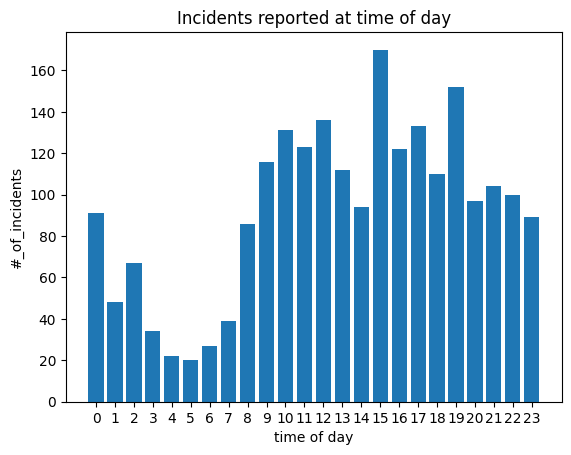

In [38]:
# values for x and y axis
x_axis = df_4.index
y_axis = df_4['Incident_ID'].values

# Plotting the graph
plt.bar(x_axis, y_axis)

# setting label of y-axis
plt.ylabel("#_of_incidents")
 
# setting label of x-axis
plt.xlabel("time of day")
plt.xticks(np.arange(len(df_4.index)), x_axis)
plt.title("Incidents reported at time of day")
plt.show()

## 5) What is the percentage of crime committed from 2016 to 2022 and display the most committed crime during these years?

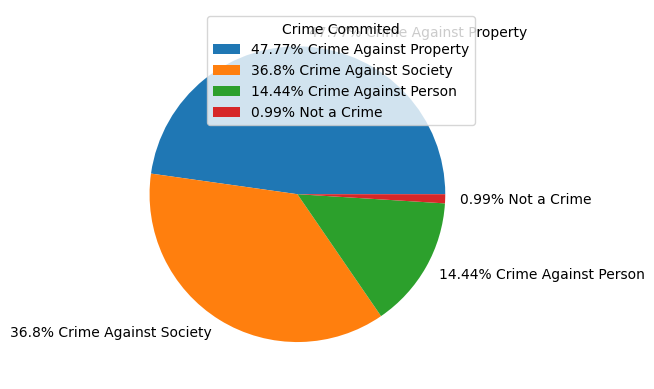

In [39]:
# Calculating the frequency of crimes
crimes = df['Crime_Name1'].value_counts()

# Calculating the percentages of crimes
percentage = round(crimes * 100 / crimes.sum(), 2).astype(str) + '% ' + crimes.index

# Plotting the pie graph
plt.pie(crimes, labels = percentage )
plt.legend(title = "Crime Commited")
plt.show()

In [40]:
print("%s has occurred %d times which is the highest of all"%(crimes.index[0],crimes[0]))

Crime Against Property has occurred 1062 times which is the highest of all


### 6) How many ASSAULT - 2ND DEGREE incidents happened and number of victims from 2020 to 2022

In [41]:
# Masking the data with Crime_Name3 an year
df_new = df[(df['Crime_Name3'] == 'ASSAULT - 2ND DEGREE') & (df['Year'].isin([2022, 2021, 2020]))][['Victims', 'Month']]

# Creating a empty dataframe
df_Assault = pd.DataFrame()
df_Assault['Victims'] = df_new.groupby('Month').sum()
df_Assault['Incidents'] = df_new.groupby('Month').count()

# Displaying 
df_Assault

,Victims,Incidents
Month,,
1.0,11,10
2.0,18,13
3.0,14,11
4.0,7,6
5.0,9,9
6.0,6,6
7.0,5,5
8.0,12,7
9.0,9,9


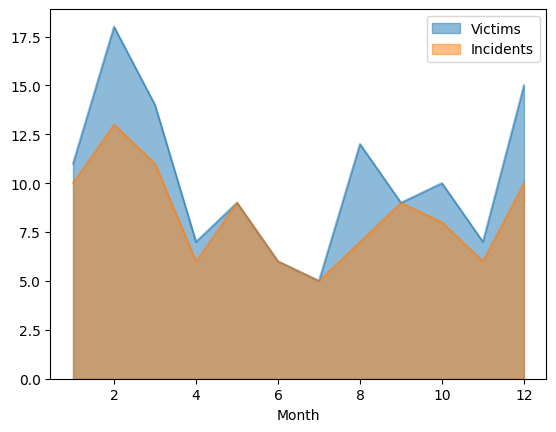

In [42]:
# Plotting the graph
ax = df_Assault.plot.area(stacked = False)

## 7) Find the number of incidents happened in various places and Which place has the most incidents reported?

In [43]:
# Selecting the columns from main dataframe
df_places = df[['Place', 'Incident_ID']]

# Splitting the place name and taking first value
df_places.Place = df_places.Place.str.split('-').str[0]

# Grouping by Place and finding the frequency
df_places = df_places.groupby(['Place']).count()

# Sorting the values
df_places.sort_values(by = 'Incident_ID', inplace = True)

# Displaying the maximum value
df_places[df_places['Incident_ID'] == df_places['Incident_ID'].max()]

,Incident_ID
Place,
Street,418


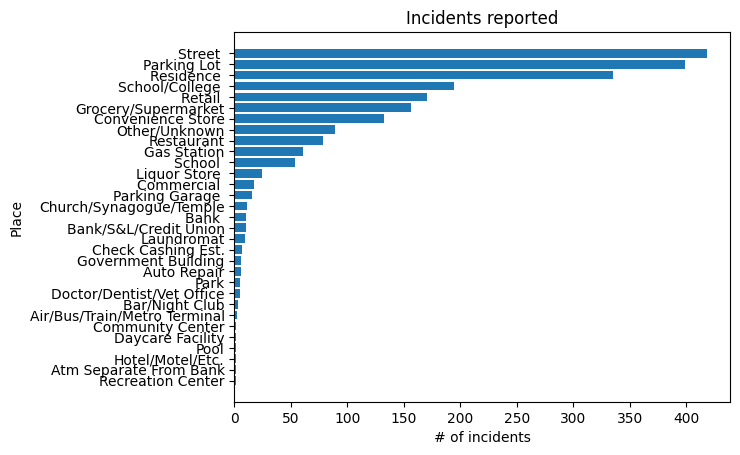

In [44]:
# Plotting the horizontal bar graph
plt.barh(df_places.index, df_places['Incident_ID'].values)

# setting label of y-axis
plt.xlabel("# of incidents")
 
# setting label of x-axis
plt.ylabel("Place")
plt.yticks(np.arange(len(df_places.index)), df_places.index)
plt.title("Incidents reported")
plt.show()

## 8) Find the number of times the crime has committed during mornings and night. From the data obtained find out which crime has mostly happened during morning time?

In [45]:
# Getting the crimes committed in morning
df_morning = df[df['Committed_At_Morning']][['Crime_Name2', 'Incident_ID']]\
                .groupby('Crime_Name2').count()\
                .rename(columns={'Incident_ID' : 'Morning'})

# Getting the crimes committed in night
df_night = df[~df['Committed_At_Morning']][['Crime_Name2', 'Incident_ID']]\
            .groupby('Crime_Name2').count()\
            .rename(columns={'Incident_ID' : 'Night'})

# Concating the morning and night dataframes
df_concat = pd.concat([df_morning, df_night], axis=1).fillna(0)
df_concat[df_concat['Morning'] == df_concat['Morning'].max()]

,Morning,Night
Crime_Name2,,
Drug/Narcotic Violations,108.0,130.0


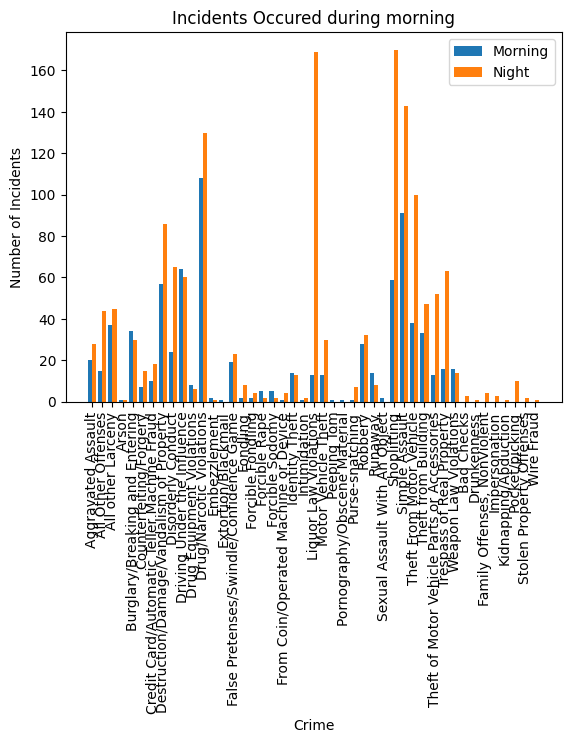

In [46]:
# plotting graph
X_axis = np.arange(len(df_concat.index))
plt.bar(X_axis - 0.2 , df_concat['Morning'], 0.4, label = 'Morning')
plt.bar(X_axis + 0.2 , df_concat['Night'], 0.4, label = 'Night')
  
# Setting the values for graph 
plt.xticks(X_axis, df_concat.index, rotation = 90)
plt.xlabel("Crime")
plt.ylabel("Number of Incidents")
plt.title("Incidents Occured during morning")
plt.legend()
plt.rcParams["figure.figsize"] = (25,5)
plt.show()

## 9) What is the maximum, minimum and average response of dispatch team during simple assault and display the number times the dispatch unit has reached in average time?

In [47]:
# Masking the dataframe on Crime_Name2
df_9 = df[df['Crime_Name2'] == 'Simple Assault'][['Dispatch_Date_Time', 'Start_Date_Time']]

# Calculating the response time
df_9['Response_Time'] = (df_9['Dispatch_Date_Time'] - df_9['Start_Date_Time']).abs()

# Displaying the top 5 rows
df_9.head()

,Dispatch_Date_Time,Start_Date_Time,Response_Time
0,2020-01-22 21:14:00,2020-01-20 15:00:00,2 days 06:14:00
9,2021-05-30 17:21:00,2021-05-30 17:17:00,0 days 00:04:00
12,2021-10-19 16:01:00,2021-10-19 16:00:00,0 days 00:01:00
13,2021-08-10 21:52:00,2021-08-10 21:52:00,0 days 00:00:00
17,2021-07-10 21:30:00,2021-07-10 21:30:00,0 days 00:00:00


In [48]:
# Displaying min, max and avg of response time
print('The minimum response time is :', df_9['Response_Time'].min())
print('The maximum response time is :', df_9['Response_Time'].max())
print('The average response time is :', df_9['Response_Time'].mean())

The minimum response time is : 0 days 00:00:00
The maximum response time is : 1188 days 19:32:00
The average response time is : 6 days 16:22:01.538461538


In [49]:
# Calculating the number of times responded in average time
print("Dispatch unit has reached the crime scene for %d crimes with in average time"%
      df_9[df_9['Response_Time'] <= df_9['Response_Time'].mean()]['Response_Time'].shape[0])

Dispatch unit has reached the crime scene for 228 crimes with in average time


## 10) Find the street and crimes committed during night time and display the street which has a greater number of victims during nighttime per year?

In [50]:
# Calculating the crimes commited per year and street in night
df_10 = df[~df['Committed_At_Morning']][['Year','Street_Name','Victims']]\
            .groupby(['Year','Street_Name'])\
            .sum()\
            .reset_index()\
            .sort_values(by = ['Year','Street_Name'])

In [51]:
# Displaying the year, count and street name
for year in df_10['Year'].unique():
    year_df = df_10[df_10['Year'] == year][['Street_Name', 'Victims']]
    print('The maximum count in %d is %d in %s'%
          (year, year_df['Victims'].max(),
                      year_df[year_df['Victims'] == year_df['Victims'].max()]['Street_Name'].values[0] ))

The maximum count in 2018 is 421 in UNIVERSITY
The maximum count in 2019 is 367 in UNIVERSITY
The maximum count in 2020 is 276 in UNIVERSITY
The maximum count in 2021 is 248 in UNIVERSITY
The maximum count in 2022 is 131 in UNIVERSITY


In [52]:
# Creating a dataframe on the data obtained
df_t = pd.DataFrame()
for year in df_10.Year.unique():
    d = df_10[df_10['Year'] == year][['Street_Name','Victims']].set_index('Street_Name').rename(columns={'Victims':year})
    df_t = pd.concat([df_t, d], axis=1)

# Fillinf the null values with 0
df_t = df_t.fillna(0)
df_t

,2018.0,2019.0,2020.0,2021.0,2022.0
Street_Name,,,,,
CONNECTICUT,1.0,0.0,0.0,0.0,0.0
EXCHANGE,1.0,1.0,0.0,0.0,0.0
INFIELD,2.0,0.0,3.0,1.0,0.0
MARKET,4.0,3.0,5.0,1.0,0.0
ORCHARD,6.0,0.0,3.0,4.0,1.0
UNIVERSITY,421.0,367.0,276.0,248.0,131.0
WISCONSIN,2.0,0.0,0.0,0.0,0.0
KANSAS,0.0,1.0,0.0,0.0,0.0
DUKE,0.0,0.0,1.0,0.0,0.0


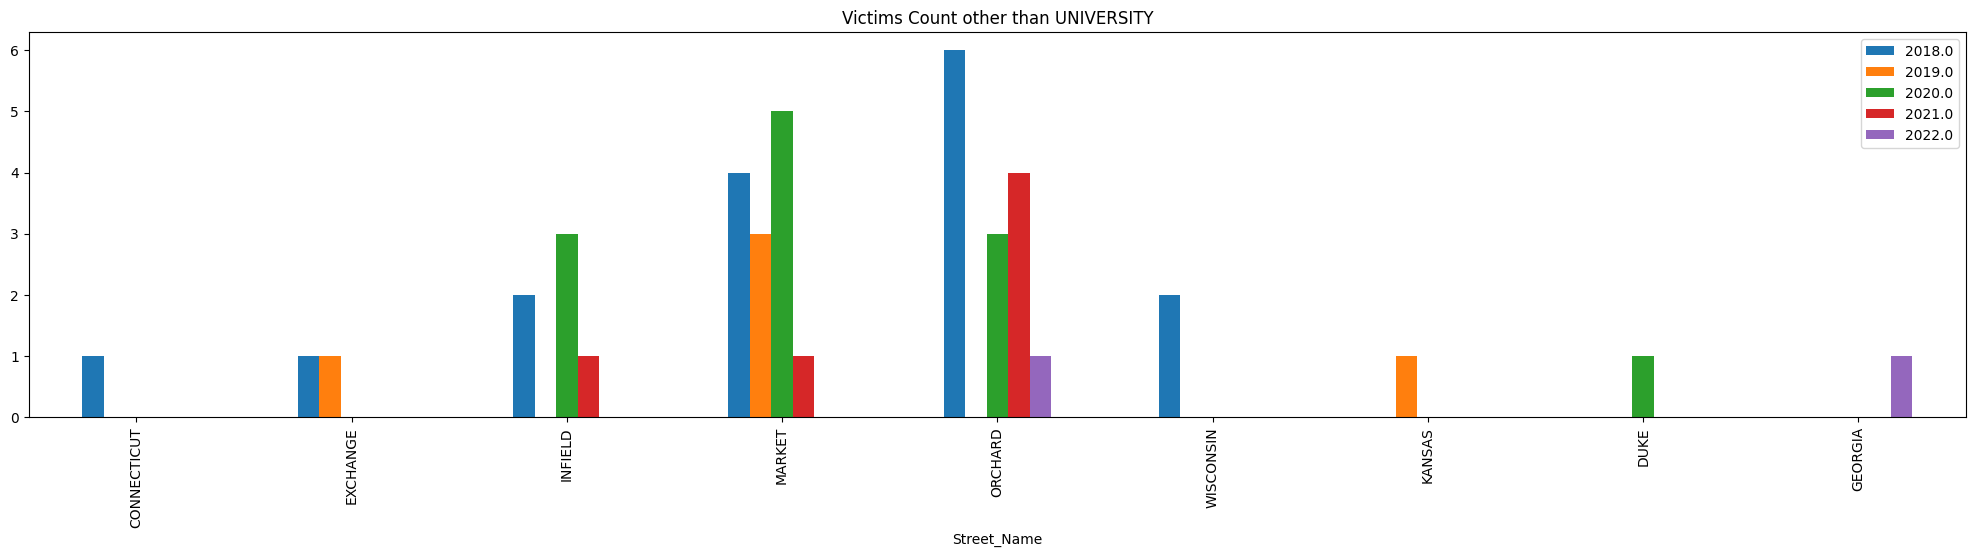

In [53]:
# Plotting the graph
df_t.loc[['CONNECTICUT', 'EXCHANGE', 'INFIELD', 'MARKET', 'ORCHARD', 'WISCONSIN', 'KANSAS', 'DUKE', 'GEORGIA']] \
        .reset_index().plot(x='Street_Name',
        kind='bar',
        stacked=False,
        title='Victims Count other than UNIVERSITY')
plt.rcParams["figure.figsize"] = (10,5)
plt.show()